# Part 1. Build a Classification Model using Text Data

### Instructor note: Big hat tip to K. Moore, Spring 2019 TA, ML for Social Sciences for putting this together


In part one of the homework, you will solve a text classification task.

You can download the following data-sets from the HW data folder on the course website:

HW4_Text_train_data.csv and HW4_text_test_data.csv

The data consists of Women’s fashion online shop reviews, consisting of a review
text, and whether the review author would recommend the product.

We are trying to determine whether a reviewer will recommend a product or not based on each review.


In a real application this might allow us to find out what is good or bad about certain products or to feature more typical reviews (like a very critical and a very positive one).

**Use cross-validation to evaluate the results. Use a metric that’s appropriate for imbalanced classification (AUC or average precision for example), and inspect all models by visualizing the coefficients.**

To complete part one of the homework do the following:

**Import the text data, vectorize the review column into an X matrix.  Then run at least three models and select a single best model.  Note that you can also create three models that simply use different types of explanatory variables such as a logistic regression with different n grams or different tokenizers.  Be sure to explain your choice and evaluate this model using the test set.**

### Import the Text Data

In [0]:
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

# Read in the Data from Internet File
train_data=pd.read_csv("https://s3.amazonaws.com/mlsitetest/HW4_Text_train_data.csv")
test_data=pd.read_csv("https://s3.amazonaws.com/mlsitetest/HW4_Text_test_data.csv")

### Vectorize the Review Column into an X-matrix

In [0]:
# Combine the Text 
text=pd.concat([train_data, test_data])

In [0]:
# Select just the text data from the Review column
review = text['Review']
print("type of text_train: {}".format(type(review)))
print("length of text_train: {}".format(len(review)))
print("text_train[200]:\n{}".format(review[200]))

type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 22642
text_train[200]:
200    .Cutest dress i own. very flattering, makes yo...
200    .I just received this and had ordered it in my...
Name: Review, dtype: object


In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize
count = CountVectorizer().fit(review)
X = count.transform(review)
print("Vectorized X:\n{}".format(repr(X)))

Vectorized X:
<22642x14679 sparse matrix of type '<class 'numpy.int64'>'
	with 999907 stored elements in Compressed Sparse Row format>


In [0]:
print(X.vocabulary_) # DO NOT RUN THIS!!

In [0]:
# Here's what the raw data looks like
feature_names = count.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 14679
First 20 features:
['00', '000', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs']
Features 210 to 230:
['18th', '19', '190', '190lbs', '1920', '1920s', '1930', '1940', '1940s', '1950', '1950s', '195lbs', '1960s', '1970', '1970s', '1973', '198', '1980s', '1982', '1987']
Every 200th feature:
['00', '174', '39ish', 'accented', 'ags', 'annoy', 'ashamed', 'badass', 'beginnings', 'blisters', 'bracelet', 'bunching', 'carol', 'chelan', 'clip', 'compareed', 'contri', 'creations', 'dangly', 'depends', 'discern', 'dr4ess', 'eclectic', 'enroute', 'exoected', 'fauves', 'flashbacks', 'forest', 'galore', 'goner', 'hahaha', 'hepburn', 'how', 'improved', 'interfacing', 'jiggles', 'labelled', 'lenox', 'longs', 'mailbox', 'measly', 'mirrors', 'multiple', 'nhl', 'occurrence', 'outerwear', 'parachute', 'personalities', 'player', 'powering', 'proportionate', 'rags', 'reflex', 'resolutions', 'rocked

In [0]:
# Limit vocabulary to meaningful words by deleting Stop-words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['against', 'always', 'an', 'none', 'my', 'already', 'fire', 'whatever', 'describe', 'keep', 'up', 'anywhere', 'between', 'thereafter', 'beforehand', 'without', 'as', 'ever', 'there', 'throughout', 'hasnt', 'ten', 'or', 'somehow', 'everyone', 'whose', 'go', 'thin', 'show', 'whither', 'ourselves', 'full']


In [0]:
# Vectorize (again)
count = CountVectorizer(stop_words="english", min_df = 5).fit(review)
X = count.transform(review)
print("Vectorized X:\n{}".format(repr(X)))

Vectorized X:
<22642x4774 sparse matrix of type '<class 'numpy.int64'>'
	with 544182 stored elements in Compressed Sparse Row format>


In [0]:
# Here's what the data looks like now
feature_names = count.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 10 features:\n{}".format(feature_names[:10]))
print("Features 800 to 810:\n{}".format(feature_names[800:810]))
print("Features 2000 to 2010:\n{}".format(feature_names[2000:2010]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 4774
First 10 features:
['00', '00p', '0p', '0petite', '10', '100', '100lbs', '102', '102lbs', '103']
Features 800 to 810:
['catch', 'catches', 'catching', 'category', 'cats', 'caught', 'causal', 'cause', 'caused', 'causes']
Features 2000 to 2010:
['hear', 'heard', 'hearing', 'heart', 'heartbeat', 'heartbroken', 'heat', 'heather', 'heathered', 'heaven']
Every 200th feature:
['00', '___________', 'associates', 'boob', 'catch', 'complementary', 'dd', 'drinks', 'fallen', 'fridays', 'hear', 'inside', 'leggings', 'measurement', 'obnoxious', 'picnic', 'proportions', 'restricted', 'sell', 'slit', 'strap', 'tenty', 'umbrella', 'weak']


In [0]:
# Split the Data
X = X
y = text['Recommended']

In [0]:
# Check the balance of the data
print(pd.Series(y).value_counts())

1    18541
0     4101
Name: Recommended, dtype: int64


**Note:** Notice that the data is imbalanced. There are a lot more recommendations that non-recommendations.

In [0]:
# X Matrix
print("X:\n{}".format(repr(X)))

X:
<22642x4774 sparse matrix of type '<class 'numpy.int64'>'
	with 544182 stored elements in Compressed Sparse Row format>


### Run At Least 3 Models

In [0]:
# Set-Up
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [0]:
# Write Function for Visualizing Coefficients in Each Model
def visualize_coefficients(coefficients, feature_names, n_top_features=25):

    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Features")

#### Model 1: Logistic Regression

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Test for Best Model Parameters of the Logistic Regression Model with GridSearch & Cross Validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring = 'roc_auc')
grid.fit(X_train, y_train)

print("LOGISTIC REGRESSION")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

LOGISTIC REGRESSION
Best cross-validation score: 0.93
Best parameters:  {'C': 0.1}


MODEL 1: LOGISTIC REGRESSION
AUC Score: 0.91
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1012
           1       0.91      0.99      0.95      4649

   micro avg       0.91      0.91      0.91      5661
   macro avg       0.92      0.78      0.83      5661
weighted avg       0.91      0.91      0.91      5661



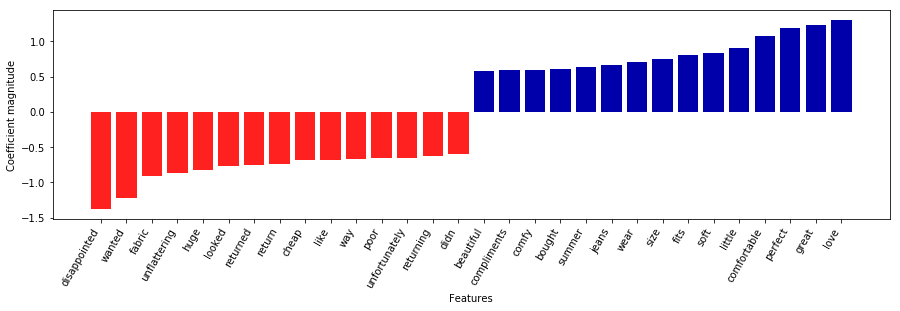

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

# Visualize Coefficients for Logistic Regression Model with Best Parameters
import matplotlib.pyplot as plt
coefs = LogisticRegression(C=0.10).fit(X_test,y_test).coef_
feature_names = count.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

# Evaluating Model Using AUC
from sklearn.metrics import accuracy_score
y_predict = grid.predict(X_test)
auc_1 = accuracy_score(y_test, y_predict)

# Evaluating Model Using Test Data 
grid.fit(X_test, y_test)

print("MODEL 1: LOGISTIC REGRESSION")

# AUC Score: Probability that the model ranks a random positive example more highly than a random negative example
print("AUC Score: {:.2f}".format(auc_1))

# F1 Score: (Precision + Recall) / 2 
print(classification_report(y_test, y_predict))

#### Model 2: Logistic Regression with tf-idf (aka. Bag of Words)

In [0]:
# Rescale the Data with tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Split the Data with tf-idf
X = X_tfidf
y = text['Recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Test for Best Model Parameters of the Logistic Regression Model with GridSearch & Cross Validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring = 'roc_auc')
grid.fit(X_train, y_train)

print("LOGISTIC REGRESSION w/ TF-IDF")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

LOGISTIC REGRESSION w/ TF-IDF
Best cross-validation score: 0.94
Best parameters:  {'C': 1}


MODEL 2: LOGISTIC REGRESSION WITH TF-IDF
AUC Score: 0.90
              precision    recall  f1-score   support

           0       0.83      0.56      0.66      1012
           1       0.91      0.97      0.94      4649

   micro avg       0.90      0.90      0.90      5661
   macro avg       0.87      0.76      0.80      5661
weighted avg       0.89      0.90      0.89      5661



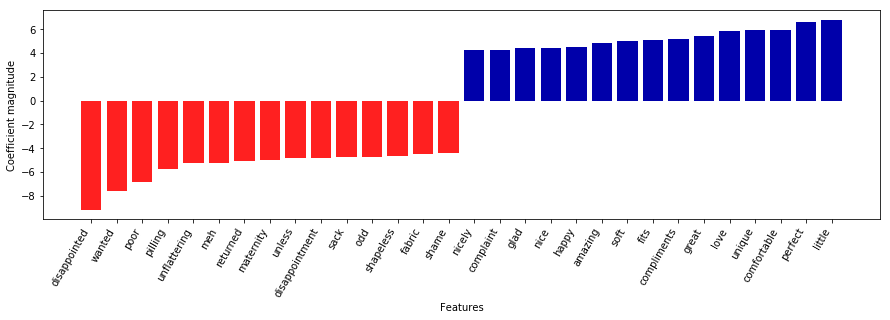

In [0]:
# Visualize Coefficients for Random Forest Model
coefs = LogisticRegression(C=10).fit(X_test,y_test).coef_
feature_names = count.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

# Evaluating Model Using AUC
from sklearn.metrics import accuracy_score
y_predict = grid.predict(X_test)
auc_2 = accuracy_score(y_test, y_predict)

# Evaluating Model Using Test Data 
grid.fit(X_test, y_test)

print("MODEL 2: LOGISTIC REGRESSION WITH TF-IDF")
print("AUC Score: {:.2f}".format(auc_2))

# F1 Score: (Precision + Recall) / 2 
print(classification_report(y_test, y_predict))

#### Model 3: Penalized Logstic Regression

In [0]:
# Split the Data
X = count.transform(review)
y = text['Recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Test for Best Model Parameters of Penalized Logistic Regression Model with GridSearch & Cross Validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(penalty='l1'), param_grid, cv=cv, scoring = 'roc_auc')
grid.fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

PENALIZED LOGISTIC REGRESSION
Best cross-validation score: 0.92
Best parameters:  {'C': 1}


MODEL 3: PENALIZED LOGISTIC REGRESSION
Best cross-validation score: 0.91
AUC Score: 0.90
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1012
           1       0.93      0.96      0.94      4649

   micro avg       0.90      0.90      0.90      5661
   macro avg       0.85      0.80      0.82      5661
weighted avg       0.90      0.90      0.90      5661



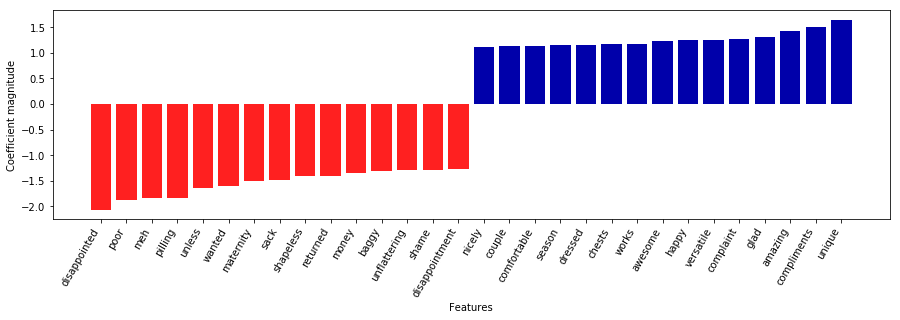

In [0]:
# Visualize Coefficients for Penalized Logistic Regression
coefs = LogisticRegression(C=1).fit(X_test,y_test).coef_
feature_names = count.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

# Evaluating Model Using AUC
from sklearn.metrics import accuracy_score
y_predict = grid.predict(X_test)
auc_3 = accuracy_score(y_test, y_predict)

# Evaluating Model Using Test Data 
grid.fit(X_test, y_test)

print("MODEL 3: PENALIZED LOGISTIC REGRESSION")
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # TEST TO MAKE SURE THIS RUNS
print("AUC Score: {:.2f}".format(auc_3))

# F1 Score: (Precision + Recall) / 2 
print(classification_report(y_test, y_predict))

#### Model 4: Logistic Regression with Bigrams

In [0]:
# Split the Data
data_trainval, y_trainval = text.Review, text.Recommended
data_train, data_test, y_train, y_test = train_test_split(data_trainval, y_trainval, stratify=y_trainval, random_state=42)

# Build the Bigram Model
cv12gramstop = CountVectorizer(ngram_range=(1, 3), min_df=4, stop_words="english")
cv12gramstop.fit(data_train)
print("(2, 2), stopwords, min_df=4: {}".format(len(cv12gramstop.vocabulary_)))

X_train = cv12gramstop.fit_transform(data_train)
X_test = cv12gramstop.transform(data_test)

(2, 2), stopwords, min_df=4: 26596


In [0]:
# Test for Best Model Parameters of  Logistic Regression Model with GridSearch & Cross Validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("LOGISTIC REGRESSION with BIGRAMS")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

LOGISTIC REGRESSION with BIGRAMS
Best cross-validation score: 0.90
Best parameters:  {'C': 0.1}


MODEL 4: LOGISTIC REGRESSION w BIGRAMS
Best cross-validation score: 0.89
AUC Score: 0.96
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1025
           1       0.96      0.99      0.98      4636

   micro avg       0.96      0.96      0.96      5661
   macro avg       0.96      0.90      0.93      5661
weighted avg       0.96      0.96      0.96      5661



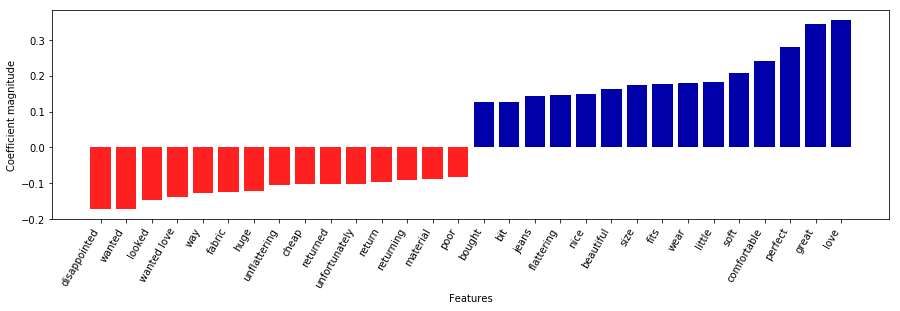

In [0]:
# Visualize Coefficients for Penalized Logistic Regression
coefs = LogisticRegression(C=0.001).fit(X_train, y_train).coef_
feature_names = cv12gramstop.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

# Evaluating Model Using AUC
from sklearn.metrics import accuracy_score
y_predict = grid.predict(X_test)
auc_4 = accuracy_score(y_test, y_predict)

# Evaluating Model Using Test Data 
grid.fit(X_test, y_test)

print("MODEL 4: LOGISTIC REGRESSION w BIGRAMS")
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # TEST TO MAKE SURE THIS RUNS
print("AUC Score: {:.2f}".format(auc_4))

# F1 Score: (Precision + Recall) / 2 
print(classification_report(y_test, y_predict))

In [0]:
# Summary (I'D LIKE TO TURN THIS INTO A TABLE)
print("AUC Scores from All Four Models")
print("Logistic Regression: {:.2f}".format(auc_1))
print("Logistic Regression (Bag of Words): {:.2f}".format(auc_2))
print("Penalized Logistic Regression: {:.2f}".format(auc_3))
print("Logistic Regression w/ Bi- & Tri-grams: {:.2f}".format(auc_4))

AUC Scores from All Four Models
Logistic Regression: 0.91
Logistic Regression (Bag of Words): 0.90
Penalized Logistic Regression: 0.90
Logistic Regression w/ Bi- & Tri-grams: 0.90


# Part II. Build a predictive neural network using Keras

To complete part two of the homework do the following:

**Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.**

Data can be imported via the following link:

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

**Include code for selecting the number of hidden units using GridSearchCV and evaluation on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.**

In [0]:
import os
os.system("pip install keras")
import os
os.system("pip install tensorflow")
import keras
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as ny
import pandas as pd
from keras.optimizers import SGD
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

### Import Iris Data

In [0]:
data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv" , encoding="latin_1")

# Update Data to Set Up for Train Test Split
data = data.iloc[:,1:]
y = data['Species']
X = data.loc[:, data.columns != 'Species']

# Transform non-numerical y-labels to numerical labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = keras.utils.to_categorical(encoded_Y)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Build a Feed Forward Neural Network with 2 Hidden Layers Using the Keras Sequential Interface.

In [0]:
# Create a Function that Builds the Model
def compile_model(n = 8, learn_rate = 0.01):
    # Create the Model
    model = Sequential() 
    model.add(Dense(n, input_dim=4, activation='relu'))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile the Model
    optimizer = SGD(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

### Include Code for Selecting the Number of Hidden Units using GridSearchCV on a Test-Set

#### Adjusting Number of Epochs

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
param_grid = dict(epochs=[10,20,30])


# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train, y_train)


# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.2f} ({:.2f}) with {}".format(mean, stdev, param))

Best score is 0.54, Best parameter is {'epochs': 30}
0.44 (0.11) with {'epochs': 10}
0.52 (0.14) with {'epochs': 20}
0.54 (0.17) with {'epochs': 30}


#### Adjusting Learn Rate

In [0]:
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
learn_rate = [0.0001, 0.001, 0.01, 0.02]

# Set Dictionary for the Parameters
param_grid = dict(learn_rate=learn_rate) 

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid = grid.fit(X_train, y_train)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.2f} ({:.2f}) with {}".format(mean, stdev, param))

Best score is 0.58, Best parameter is {'learn_rate': 0.02}
0.36 (0.02) with {'learn_rate': 0.0001}
0.42 (0.12) with {'learn_rate': 0.001}
0.38 (0.24) with {'learn_rate': 0.01}
0.58 (0.12) with {'learn_rate': 0.02}


#### Adjusting Number of Neurons in a Layer

In [0]:
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
param_grid = dict(n=[16,32,48,64,80,96,112,128]) 

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train, y_train)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.2f} ({:.2f}) with {}".format(mean, stdev, param))

Best score is 0.57, Best parameter is {'n': 112}
0.29 (0.17) with {'n': 16}
0.46 (0.17) with {'n': 32}
0.46 (0.13) with {'n': 48}
0.50 (0.10) with {'n': 64}
0.46 (0.16) with {'n': 80}
0.34 (0.05) with {'n': 96}
0.57 (0.14) with {'n': 112}
0.52 (0.17) with {'n': 128}


#### Adjust Batches and Epochs Simultaneously!

In [0]:
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
epochs = [10,20,30]
batches = [5, 10, 20] 
param_grid = dict(epochs=epochs, batch_size=batches)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train, y_train)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.2f} ({:.2f}) with {}".format(mean, stdev, param))

Best score is 0.87, Best parameter is {'batch_size': 10, 'epochs': 10}
0.56 (0.30) with {'batch_size': 5, 'epochs': 10}
0.82 (0.12) with {'batch_size': 5, 'epochs': 20}
0.80 (0.12) with {'batch_size': 5, 'epochs': 30}
0.87 (0.08) with {'batch_size': 10, 'epochs': 10}
0.71 (0.13) with {'batch_size': 10, 'epochs': 20}
0.83 (0.13) with {'batch_size': 10, 'epochs': 30}
0.79 (0.10) with {'batch_size': 20, 'epochs': 10}
0.76 (0.13) with {'batch_size': 20, 'epochs': 20}
0.73 (0.10) with {'batch_size': 20, 'epochs': 30}


**Note:** When you balance the number of epochs with batch size, you can run more epochs in less time and get a higher accuracy!

#### Adjust Neurons and Learn Rate, too!

In [0]:
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
n = [16,32,48,64]
learn_rate = [0.0001, 0.001, 0.01]
param_grid = dict(n=n, learn_rate=learn_rate)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train, y_train)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.2f} ({:.2f}) with {}".format(mean, stdev, param))

Best score is 0.42, Best parameter is {'learn_rate': 0.01, 'n': 64}
0.41 (0.09) with {'learn_rate': 0.0001, 'n': 16}
0.31 (0.22) with {'learn_rate': 0.0001, 'n': 32}
0.37 (0.16) with {'learn_rate': 0.0001, 'n': 48}
0.38 (0.02) with {'learn_rate': 0.0001, 'n': 64}
0.29 (0.06) with {'learn_rate': 0.001, 'n': 16}
0.36 (0.03) with {'learn_rate': 0.001, 'n': 32}
0.36 (0.03) with {'learn_rate': 0.001, 'n': 48}
0.29 (0.06) with {'learn_rate': 0.001, 'n': 64}
0.34 (0.04) with {'learn_rate': 0.01, 'n': 16}
0.40 (0.14) with {'learn_rate': 0.01, 'n': 32}
0.35 (0.04) with {'learn_rate': 0.01, 'n': 48}
0.42 (0.09) with {'learn_rate': 0.01, 'n': 64}


**Note:** When you balance the number of neurons with the learning rate, best parameters suggest a smaller number of neurons and a smaller learning rate. Interesting stuff!

### Describe the Predictive Strength of Best Model

In [0]:
# Update Model with New Parameters
best_model = Sequential() # Best Parameter
best_model.add(Dense(64, input_dim=4, activation='relu'))
best_model.add(Dense(64, activation='relu'))
best_model.add(Dense(3, activation='softmax'))

# Compile Model
optimizer = SGD(lr=0.01) # Best Parameter
best_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the Model
best_model.fit(X_train, y_train,  epochs=10, batch_size=10) # Best Parameter
score = best_model.evaluate(X_test, y_test, batch_size=10)

print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Epoch 1/10
112/112 [==============================] - 2s 16ms/step - loss: 1.1369 - acc: 0.5268
Epoch 2/10
112/112 [==============================] - 0s 308us/step - loss: 0.8525 - acc: 0.6339
Epoch 3/10
112/112 [==============================] - 0s 295us/step - loss: 0.7545 - acc: 0.6786
Epoch 4/10
112/112 [==============================] - 0s 314us/step - loss: 0.7019 - acc: 0.6696
Epoch 5/10
112/112 [==============================] - 0s 315us/step - loss: 0.6396 - acc: 0.7321
Epoch 6/10
112/112 [==============================] - 0s 347us/step - loss: 0.6155 - acc: 0.7054
Epoch 7/10
112/112 [==============================] - 0s 366us/step - loss: 0.5889 - acc: 0.6875
Epoch 8/10
112/112 [==============================] - 0s 340us/step - loss: 0.5454 - acc: 0.7946
Epoch 9/10
112/112 [==============================] - 0s 354us/step - loss: 0.5083 - acc: 0.8214
Epoch 10/10
38/38 [==============================] - 1s 14ms/step
Test loss: 0.448
Test Accuracy: 0.842


**Conclusion:** Given the limits of the tuned parameters selected above, we can see that a model with 64 neurons in the hidden layers, a learn_rate of 0.01, 10 epochs, and 10 batches the model gives the highest performance with loss of 0.44 and accuracy of 0.71. The loss decreases continuously with iteration. The model does a fair job of accurately predicting the test dataset.